In [572]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression

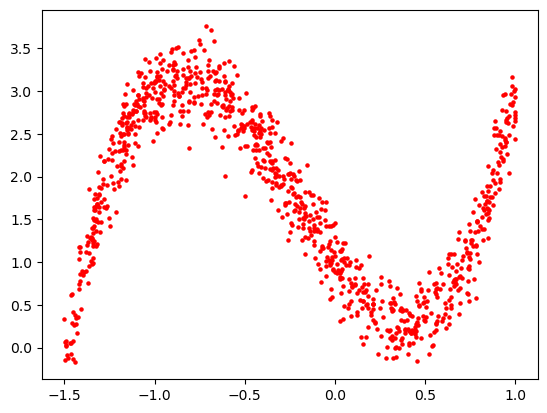

In [573]:
X = np.array([random.uniform(-1.5, 1.0) for _ in range(1000)]).reshape(-1,1)
Y = np.array([3*x**3 + 2*x**2 - 3*x + 1 + np.random.normal(0,0.25) for x in X]).reshape(-1,1)

plt.figure()
plt.scatter(X, Y, color='r', s=5)
plt.show()

In [574]:
x_degrees = [PolynomialFeatures(i).fit_transform(X) for i in range(1,5)]
for i in range(4):
    print("degree-{} polynomial features shape: ".format(i+1), x_degrees[i].shape)

degree-1 polynomial features shape:  (1000, 2)
degree-2 polynomial features shape:  (1000, 3)
degree-3 polynomial features shape:  (1000, 4)
degree-4 polynomial features shape:  (1000, 5)


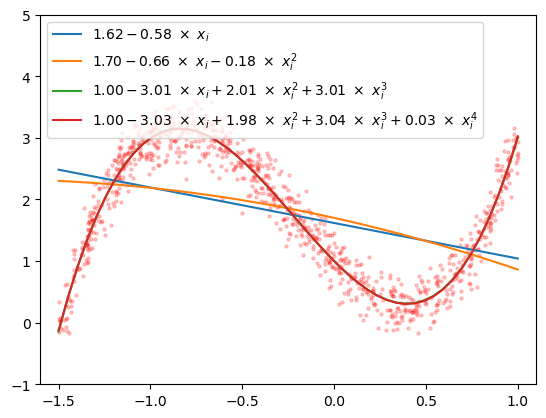

In [575]:
plt.figure()
plt.xlim((-1.6,1.1))
plt.ylim((-1,5))

ls = []
for i in range(1,5):
    poly_model = make_pipeline(PolynomialFeatures(i), LinearRegression())
    poly_model.fit(X, Y)
    XX = np.linspace(-1.5, 1).reshape(-1,1)
    YY = poly_model.predict(XX)
    
    w = poly_model.steps[1][1].coef_[0][1:]
    b = poly_model.steps[1][1].intercept_[0]
    label = "$" + "{:.2f}".format(b)
    for idx, c in enumerate(w):
        label += "{:+.2f}".format(c) + "\\ \\times \\" + " x_i" 
        label = label + "^{}".format(idx+1) if idx != 0 else label
    label += "$"
    
    l = plt.plot(XX, YY, label=label)[0]
    ls.append(l)

plt.legend(handles=ls)

plt.scatter(X, Y, color='r', s=5, alpha=0.2)
plt.show()

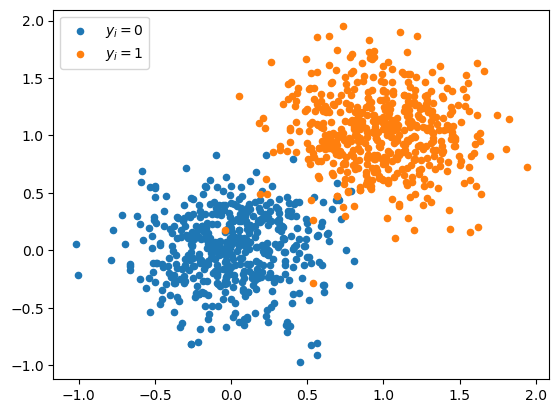

In [576]:
Y = np.array([random.randint(0,1) for i in range(1000)])
X0, X1, X = [], [], []
for y in Y:
    x0, x1 = np.random.multivariate_normal([y,y], [[0.1,0],[0,0.1]]).T
    X0.append(x0); X1.append(x1); X.append([x0, x1])
X0 = np.array(X0); X1 = np.array(X1)
    
plt.figure()
l1 = plt.scatter(X0[Y==0], X1[Y==0], s=20, label="$y_i=0$")
l2 = plt.scatter(X0[Y==1], X1[Y==1], s=20, label="$y_i=1$")
plt.legend(handles=[l1, l2])
plt.show()

In [577]:
model = LogisticRegression()
model.fit(X, Y)

Y_pred = model.predict(X)
print("accuracy: {}".format(accuracy_score(Y, Y_pred)))
w, b = model.coef_[0].round(1), model.intercept_[0].round(1)
print("function: y = L({} + {} x0 + {} x1)".format(b, w[0], w[1]))

accuracy: 0.985
function: y = L(-5.1 + 4.8 x0 + 5.2 x1)


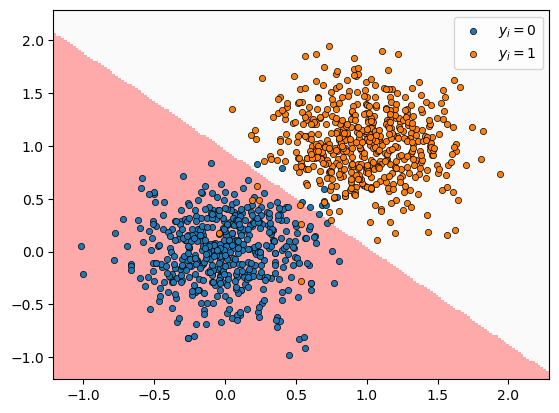

In [578]:
xx, yy = np.meshgrid(np.arange(-1.2, 2.3, 0.02), np.arange(-1.2, 2.3, 0.02))
zz = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure()
cmap = colors.ListedColormap(['#FFAAAA', '#FAFAFA'])
plt.pcolormesh(xx, yy, zz, cmap=cmap, shading='auto')
l1 = plt.scatter(X0[Y==0], X1[Y==0], s=20, label="$y_i=0$", edgecolors='black', linewidth=0.5)
l2 = plt.scatter(X0[Y==1], X1[Y==1], s=20, label="$y_i=1$", edgecolors='black', linewidth=0.5)
plt.legend(handles=[l1, l2])
plt.show()